In [1]:
using Pkg
using Catalyst, OrdinaryDiffEq, Plots, Latexify

In [16]:
rn = @reaction_network Payton begin
    hillar(T7,0,α1,K1,n), ∅ --> m_T7
    #hillr(LacI,α2,K2,n), ∅ --> m_TEV
    C, ∅ --> m_TEV
    #C, ∅ --> m_LacI
    qₘ, m_T7 --> ∅
    qₘ, m_TEV --> ∅
    #qₘ, m_LacI --> ∅
    β, m_T7 --> T7 + m_T7
    β, m_TEV --> TEV + m_TEV
    #β, m_LacI --> LacI
    g, TEV + T7 --> TEV
    #(keq, keq), IPTG + LacI <--> Complex
    qₚ7, T7 --> ∅
    qₚT, TEV --> ∅
    #qₚ, LacI --> ∅
    t_0, ∅ --> m_T7
end

#species(rn)
#parameters(rn)
#reactions(rn)
#latexify(rn)
rn = complete(rn)


Model Payton
States (4):
  m_T7(t)
  m_TEV(t)
  T7(t)
  TEV(t)
Parameters (10):
  α1
  K1
  n
  C
⋮

In [30]:
odesys = convert(ODESystem, rn)
pmap  = (:α1 => 4900.0, :K1 => 1.0, :n => 2.0, :qₘ => 100.0, :β => 1.0, :g => 1.0, :qₚ7 => 10.0, :qₚT => 1.0, :C => 385.3264, :t_0 => 100)
u₀map = [:m_T7 => 0., :m_TEV => 0., :T7 => 0.5, :TEV => 30.0]

# Define time span
tspan = (0.0, 15.0)

# create the ODEProblem we want to solve
oprob = ODEProblem(rn, u₀map, tspan, pmap)

odesys = complete(odesys)
oprob2 = ODEProblem(odesys, u₀map, tspan, pmap)


ArgumentError: ArgumentError: Any[m_T7(t), m_TEV(t), T7(t), TEV(t)] are missing from the variable map.

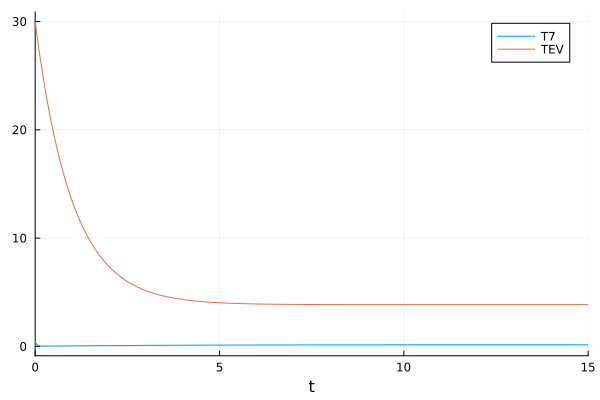

In [31]:
sol = solve(oprob, Tsit5(), saveat=0.01)
plt1 = plot(sol, idxs = [:T7, :TEV])

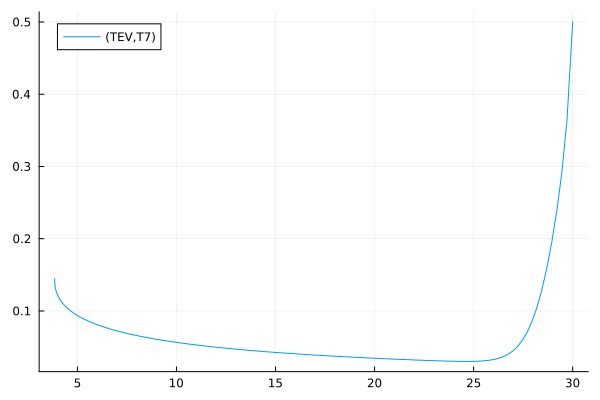

In [32]:
plt2 = plot(sol, idxs = (:TEV, :T7))

┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=0.0021402873515517008, and step error estimate = 1932.746177061044. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/paytonco/.julia/packages/SciMLBase/dHarz/src/integrator_interface.jl:589
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=0.004359945572267647, and step error estimate = 1171.532204809678. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/paytonco/.julia/packages/SciMLBase/dHarz/src/integrator_interface.jl:589
┌ Warning: dt(1.7763568394002505e-15) <= dtmin(1.7763568394002505e-15) at t=0.00889684009881318, and step error estimate = 760.5726527664891. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /home/paytonco/.julia/packages/SciMLBase/dHarz/src/integrator_interface.jl:589
┌

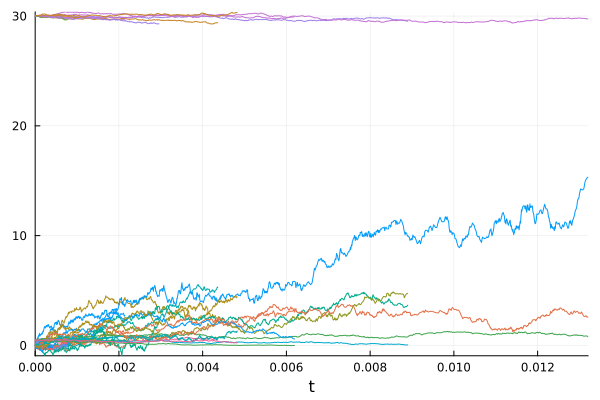

In [33]:
using StochasticDiffEq
sprob = SDEProblem(rn, u₀map, tspan, pmap)
eprob = EnsembleProblem(sprob)

sols = solve(eprob, STrapezoid(); trajectories = 10)

plot(sols)